<center>

*******************************************************************************************
<font size="4">
Generalised Cross-Wavelet Spectrum &nbsp; &nbsp; <br>
</font>

##### 25 July 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* The Generalised Cross-Wavelet Transform (GXWT) measures the interaction of two periodic signals at different time-scales, taking into account amplitude and absolute-valued phase coherence (when the phase difference is pi radians, it is considered in-phase).
>
* Dependencies:
    * [Generalised Cross-Wavelet Transform Matlab Functions](https://www.sciencedirect.com/science/article/pii/S0167945721001421?via%3Dihub#s0070) ("[external Matlab functions](#Specify-path-for-external-Matlab-functions)")
    * [Matlab](https://se.mathworks.com/products/matlab.html)
    * [Matlab Engine for Python](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
>
* Tested with:
    * Python 3.11
    * Matlab 2024b
    * Windows 11
>
* Reference:
    * Toiviainen, P., & Hartmann, M. (2022). Analyzing multidimensional movement interaction with generalized cross-wavelet transform. *Human Movement Science, 81*, 102894.
>
* Instructions:
    * Ensure that the dependecies are installed, then [specify the path for the external Matlab functions](#Specify-path-for-external-Matlab-functions).
    * Edit the values indicated with an arrow like this: <---

*******************************************************************************************

#### <ins> Matlab Engine Installation Notes </ins>

In the instructions below, the commands have to be typed in a command prompt program.

* [Installation instructions](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
* [Adding path in user account doesn't need administrator privilege.](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)

* If running Python in Anaconda environment:

    * [Path for Python interpreter](https://www.anaconda.com/docs/tools/working-with-conda/ide-tutorials/python-path)
    * If pip is not installed in the environment, make sure the environment is activated and install pip  with this command: conda install pip

* If "RuntimeError: No compatible MATLAB installation [...] This release of MATLAB Engine API for Python is compatible with version [XX]. The found versions were [YY]", use these commands:
    * to check installed Matlab's version: matlab -help
    * to install: python -m pip install matlabengine==[ZZ]
        * Note that [ZZ] has to be equal to the installed Matlab's version up to the sub-version.


In [1]:
import sys
import numpy as np

sys.path.append(r'../src')
import syncoord as sc

***
### Specify path for external Matlab functions
Found in supplementery material for Toiviainen & Hartmann (2022).

In [2]:
extfunc_path = r'C:/MyTemp/Matlab' # <--- folder with external Matlab functions

***
### Generate synthetic data

index; key; Name; duration (s):
  0; 0; Test Data; 0:16.0


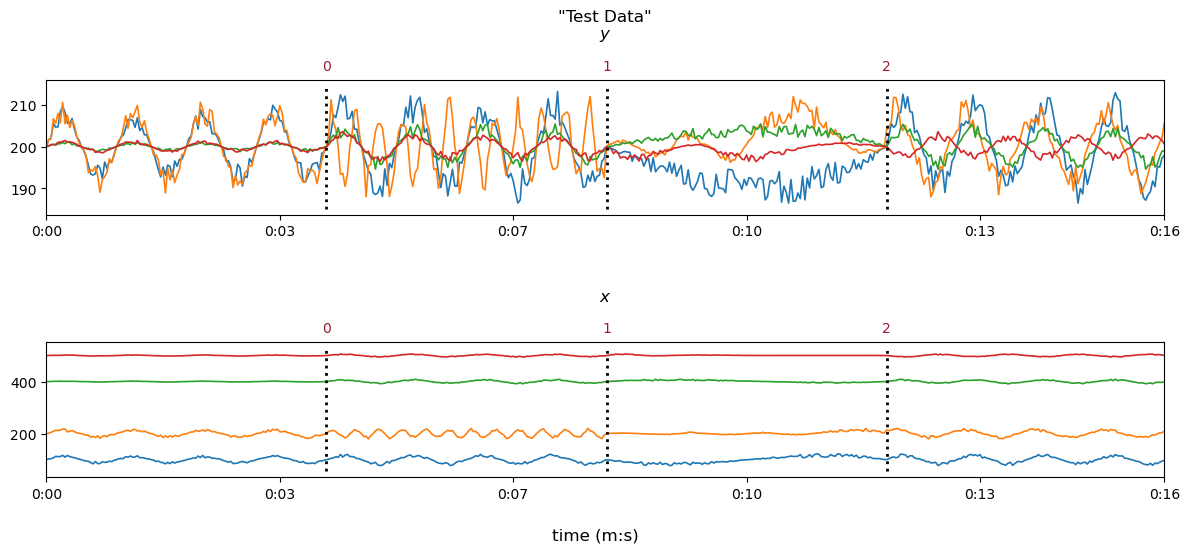

In [9]:
test_data = sc.ptdata.load( 'make', seed=1, print_info=True )
test_data.visualise( vscale=1.2, dlattr='1.2' )

***
### Pairwise Cross-Wavelet Spectrum

In [10]:
test_data.names.dim

['point', 'axis', 'frame']

Connecting to Matlab...
...connected to Matlab version 24.2.0.2712019 (R2024b)
Disconnected from Matlab.


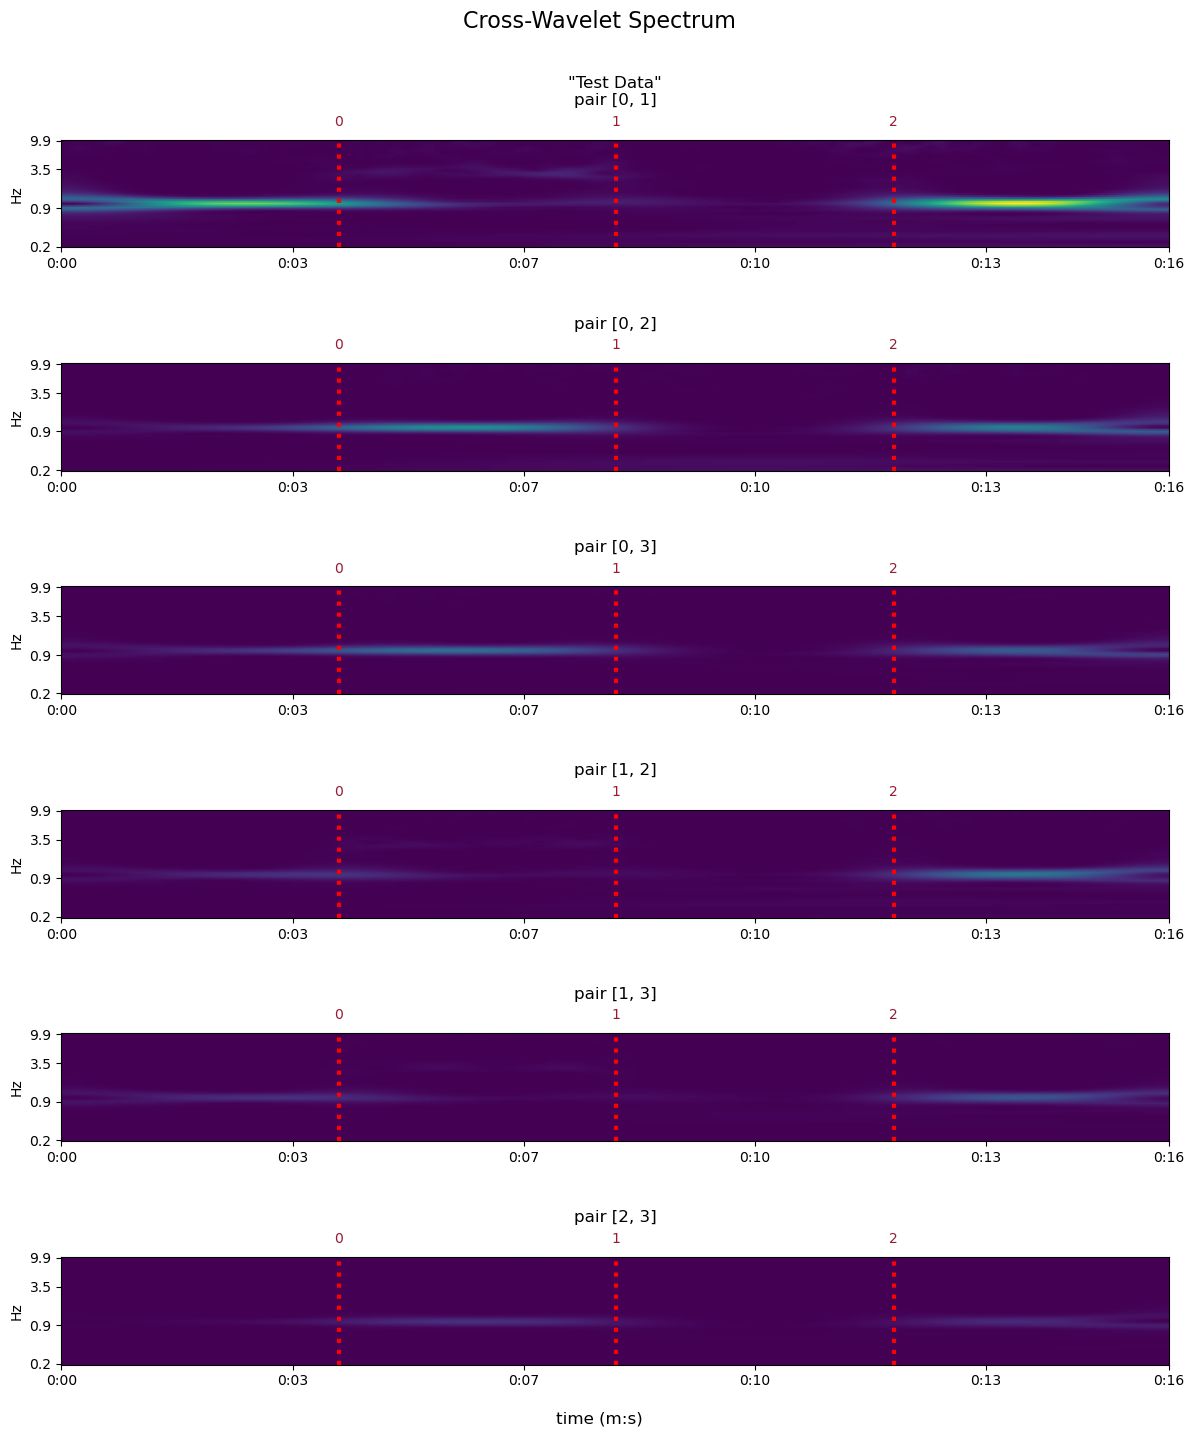

In [12]:
minmaxf = [0.1,10] # <--- minimum and maximum frequencies (Hz)

pairs_axis = 0
fixed_axes = [-2,-1]
xwspectr = sc.ptdata.gxwt( test_data, minmaxf, pairs_axis, fixed_axes, extfunc_path=extfunc_path )
xwspectr.visualise( dlattr='1.2' )

>
#### Average Cross-Wavelet Spectrum for group

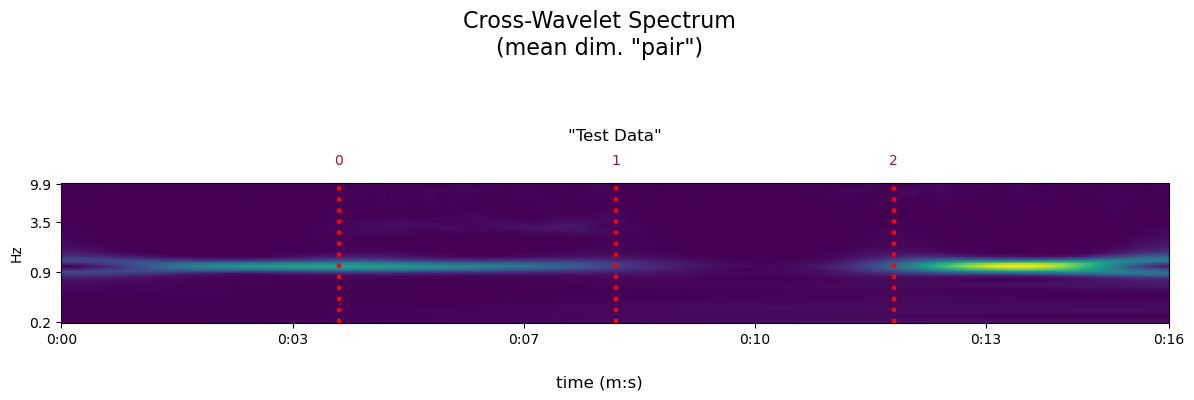

In [13]:
xwspectr_aggr_pairs = sc.ptdata.aggrax( xwspectr, axis=0, function='mean' )
xwspectr_aggr_pairs.visualise( vscale=1.4, dlattr='1.2' )

>
#### Average Cross-Wavelet Power for group

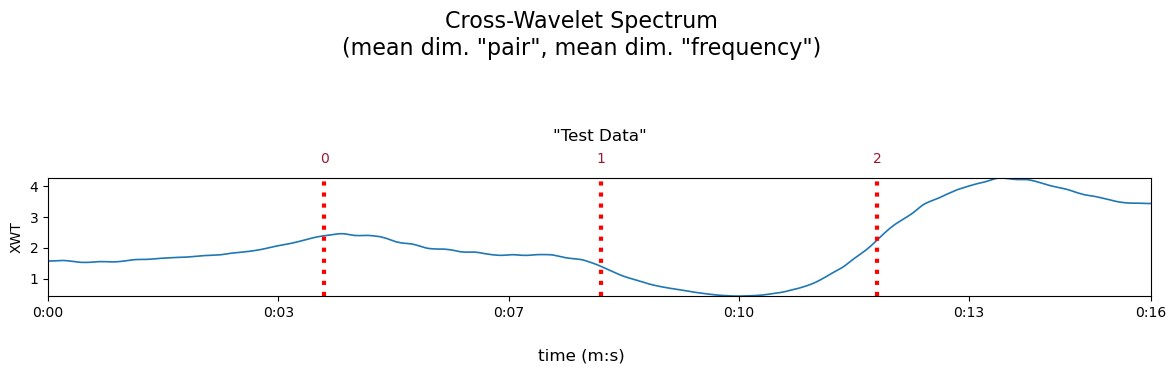

In [14]:
xwspectr_aggr_top = sc.ptdata.aggrax( xwspectr_aggr_pairs, axis=0, function='mean' )
xwspectr_aggr_top.visualise( vscale=1.3, vistype='line', dlattr='1.2' )

>
#### Sections' statistics

means = [1.713, 1.914, 0.535, 4.055]


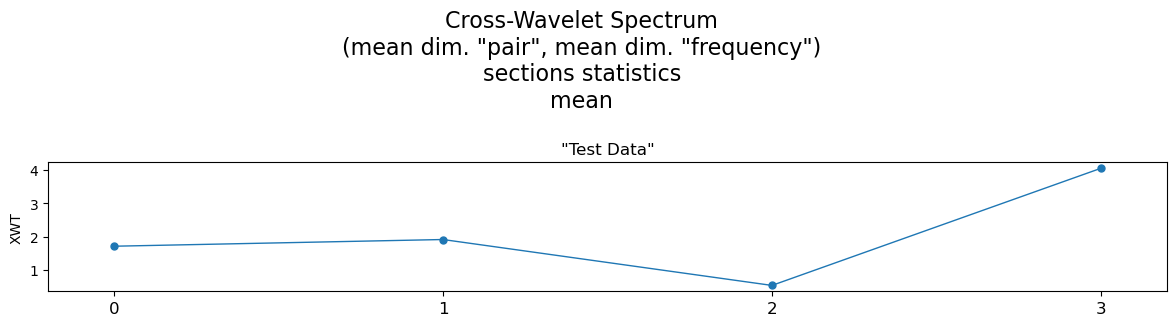

In [15]:
sec_margins = [[1,1],[1,1],[1,1],[1,1]] # <--- sections' margins (seconds)

xwspectr_aggr_top_stats = sc.ptdata.secstats( xwspectr_aggr_top, margins=sec_margins, last=True )
xwspectr_aggr_top_stats.visualise( statistics='mean' )
print('means =','['+', '.join([str(v) for v in np.round(xwspectr_aggr_top_stats.data[0][0],3)])+']')

import matplotlib.pyplot as plt
plt.xlim((-0.2,3.2))
plt.xticks((0,1,2,3),('0','1','2','3'),fontsize=12);